This lab will walk you through how you can use decision tree and random forest in sklearn on your own datasets. We will also be comparing the two methods. To begin, let's quickly review some of the decision tree intuition that should sound familiar if you've attended the corresponding decision tree lecture.

# Intuition
The Decision Tree Algorithm
This is a supervised learning algorithm, but unlike other supervised learning algorithms, the decision tree algorithm can be used for solving both regression and classification problems.

The goal of a Decision Tree is to create a model that can predict the class or value of the target variable by learning simple decision rules inferred from the training data.

Decision trees classify the examples by sorting them down the tree from the root to some leaf/terminal node, with the leaf/terminal node providing the classification of the example. Each node in the tree acts as a test case for some attribute, and each edge descending from the node corresponds to the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new node.

The primary challenge in the decision tree implementation is to identify which attributes do we need to consider as the root node at each level. For solving this attribute selection problem, researchers have devised some of the following attribute selection measures:

    Entropy,
    Information gain,
    Gini index,
    Gain Ratio,
    Reduction in Variance
    Chi-Square
These criterias will calculate values for every attribute. The values are sorted, and attributes are placed in the tree by following the order i.e, the attribute with the highest value(in case of information gain) is placed at the root.

Note: The most popular attribute selection methods that we'll use in this course are information gain and gini index.

# About The Data
We'll be using the Car Evaluation Data Set from the UCI Machine Learning Repository for this lab, but feel free to follow along with your own dataset. The dataset contains the following attributes:

    buying (v-high, high, med, low)
    maint (v-high, high, med, low)
    doors (2, 3, 4, 5-more)
    persons (2, 4, more)
    lug_boot (small, med, big)
    safety (low, med, high)
    class (unacc, acc, good, vgood)

In [1]:
# Importing numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import rcParams from matplotlib
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
# Example code from pdf
# Load car_evaluation.csv into pandas Dataframe
# Manually add columns
# call .head()
car_data = pd.read_csv('car_evaluation.csv', header = None)
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# My practical code
# Test to see if I can straight up printing
print(car_data.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


In [5]:
# Example code from pdf
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
# My practical code
# show_counts = False
car_data.info(show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   buying    object
 1   maint     object
 2   doors     object
 3   persons   object
 4   lug_boot  object
 5   safety    object
 6   class     object
dtypes: object(7)
memory usage: 94.6+ KB


<AxesSubplot:xlabel='safety', ylabel='count'>

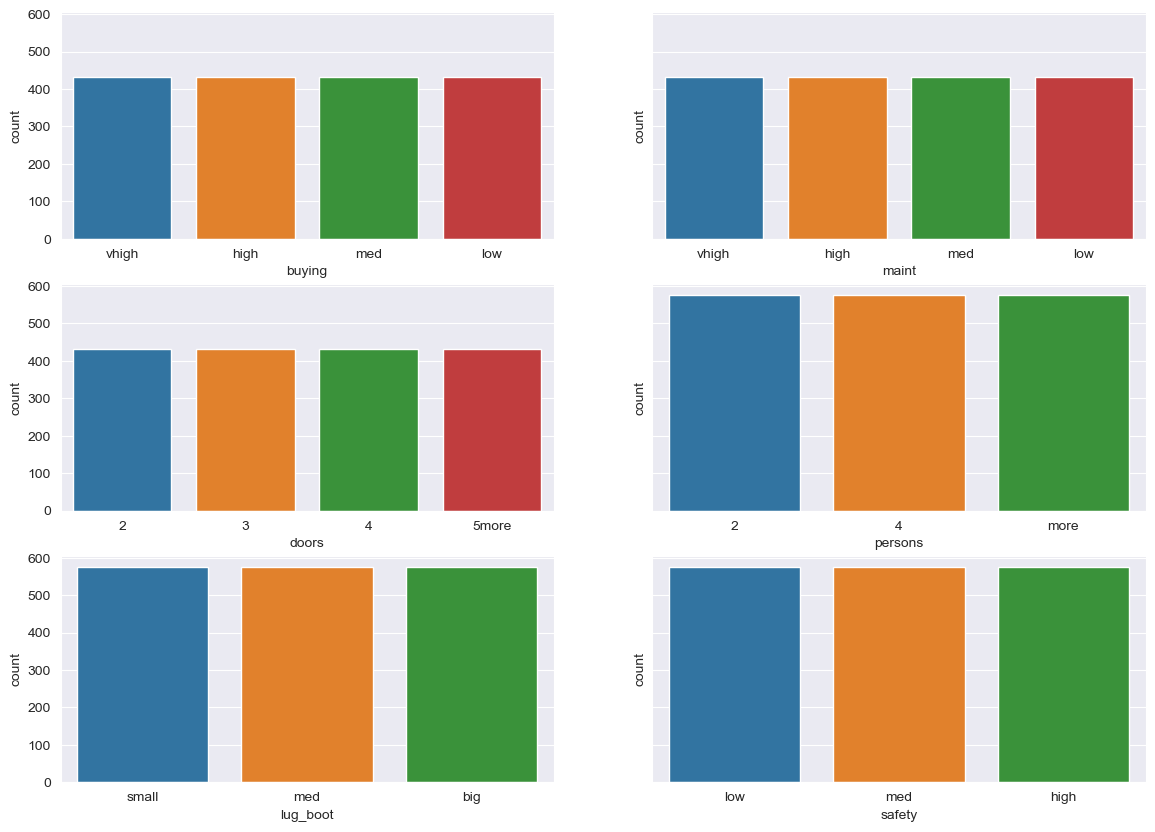

In [7]:
# Example code from pdf
# Create countplots for each column
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey = True, figsize = (14, 10))

sns.countplot(x = car_data['buying'], ax = axes[0][0])
sns.countplot(x = car_data['maint'], ax = axes[0][1])
sns.countplot(x = car_data['doors'], ax = axes[1][0])
sns.countplot(x = car_data['persons'], ax = axes[1][1])
sns.countplot(x = car_data['lug_boot'], ax = axes[2][0])
sns.countplot(x = car_data['safety'], ax = axes[2][1])

<AxesSubplot:xlabel='safety', ylabel='count'>

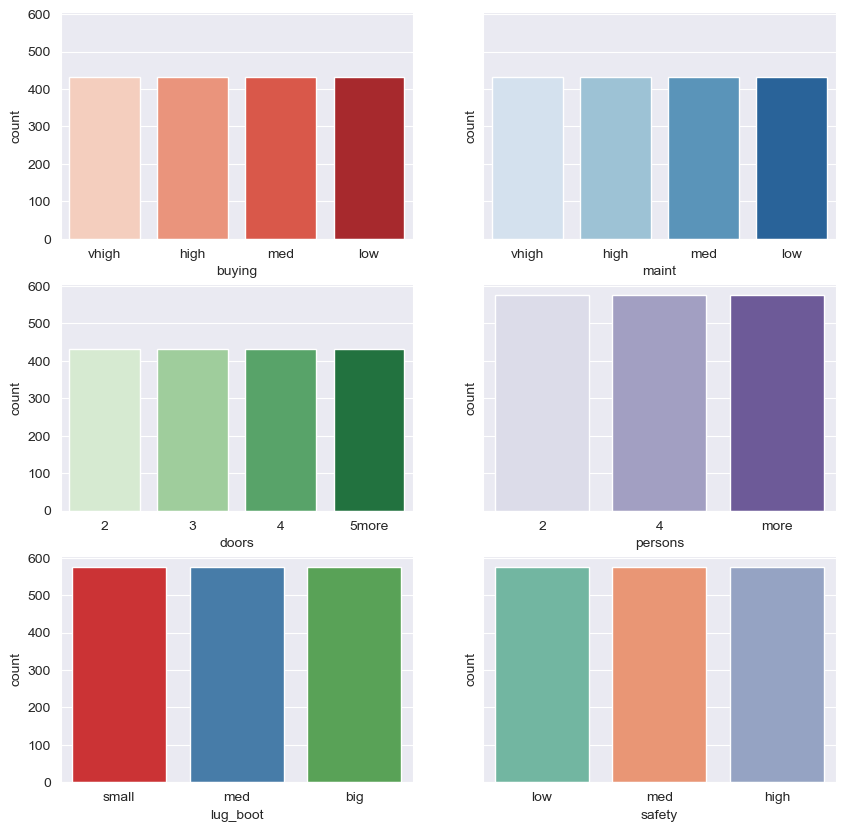

In [8]:
# My Practical code
# Changing figsize to (10, 10)
# Changing colors for all charts
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey = True, figsize = (10, 10))

sns.countplot(x = car_data['buying'], palette = "Reds", ax = axes[0][0])
sns.countplot(x = car_data['maint'], palette = "Blues", ax = axes[0][1])
sns.countplot(x = car_data['doors'], palette = "Greens", ax = axes[1][0])
sns.countplot(x = car_data['persons'], palette = "Purples", ax = axes[1][1])
sns.countplot(x = car_data['lug_boot'], palette = "Set1", ax = axes[2][0])
sns.countplot(x = car_data['safety'], palette = "Set2", ax = axes[2][1])

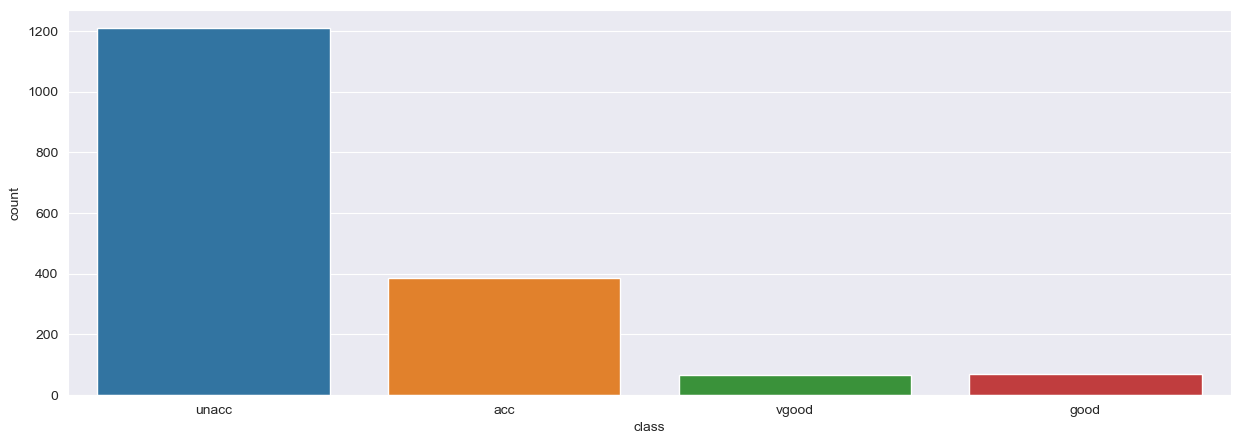

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
# Example code from pdf
# Look at class variable in countplot
sns.countplot(x = car_data['class'])
plt.show()
car_data['class'].value_counts()

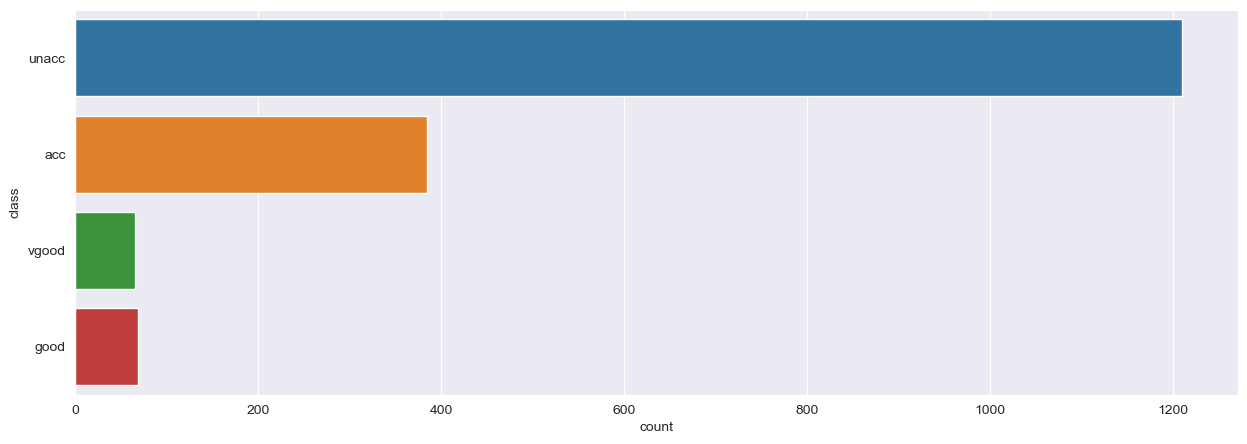

In [10]:
# My practical code
# Flip the chart to horizontally 
sns.countplot(y = car_data['class'])
plt.show()

# Data Preprocessing

In [11]:
# Example code from pdf
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [12]:
# My practical code
# Show more rows
car_data.head(11)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [13]:
# Example code from pdf
# Mapping all columns by in order
buying_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
maint_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
door_mappings = {'2':2, '3':3, '4':4, '5more':5}
persons_mappings = {'2':2, '4':4, 'more':5}
lug_boot_mappings = {'small':0, 'med':1, 'big':2}
safety_mappings = {'low':0, 'med':1, 'high':2}
class_mappings = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

In [14]:
# My practical code
# Check to see if mapping is placed correctly
print("buying:", buying_mappings)
print("maint:", maint_mappings)
print("doors:", door_mappings)
print("persons", persons_mappings)
print("lug_boot", lug_boot_mappings)
print("safety", safety_mappings)
print("class", class_mappings)

buying: {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
maint: {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}
doors: {'2': 2, '3': 3, '4': 4, '5more': 5}
persons {'2': 2, '4': 4, 'more': 5}
lug_boot {'small': 0, 'med': 1, 'big': 2}
safety {'low': 0, 'med': 1, 'high': 2}
class {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}


In [15]:
# Example code from pdf
# pass pandas .map(dictionary) to apply our mappings
car_data['buying'] = car_data['buying'].map(buying_mappings)
car_data['maint'] = car_data['maint'].map(maint_mappings)
car_data['doors'] = car_data['doors'].map(door_mappings)
car_data['persons'] = car_data['persons'].map(persons_mappings)
car_data['lug_boot'] = car_data['lug_boot'].map(lug_boot_mappings)
car_data['safety'] = car_data['safety'].map(safety_mappings)
car_data['class'] = car_data['class'].map(class_mappings)

<AxesSubplot:xlabel='safety', ylabel='class'>

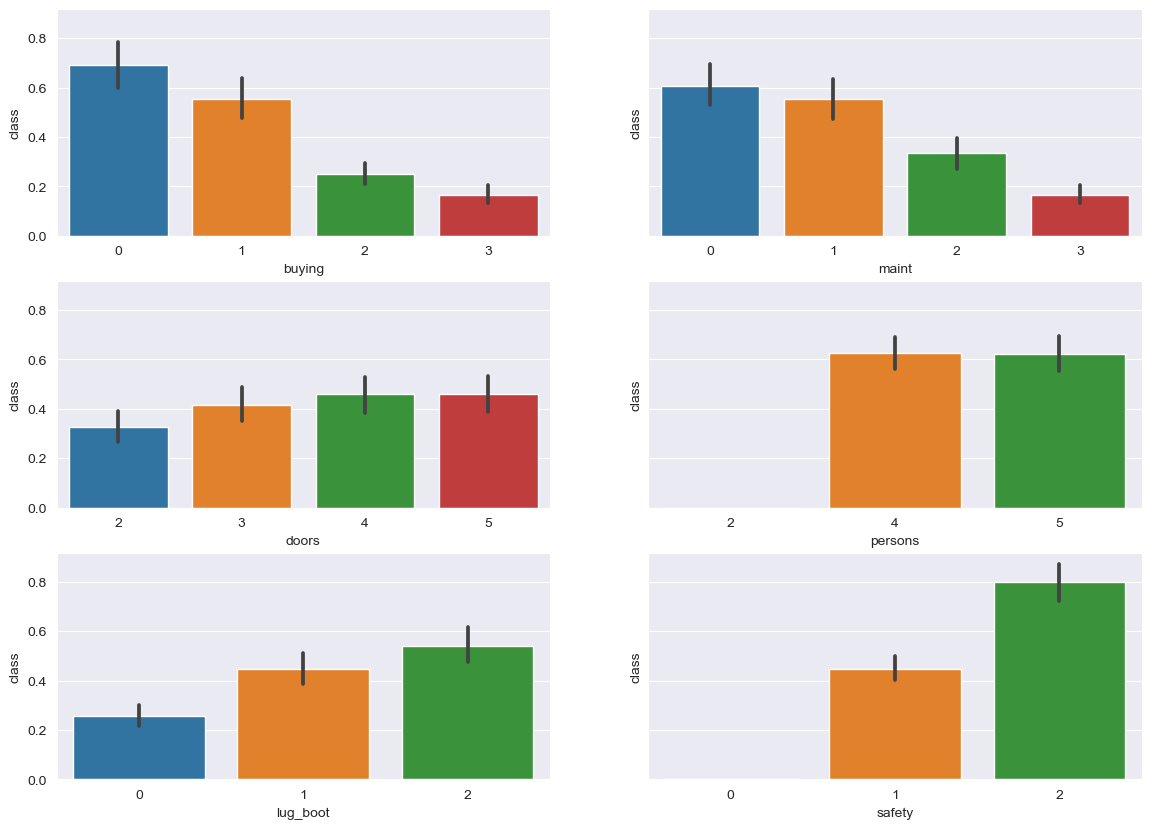

In [16]:
# My practical code
# Let's plot a barplot where columns are in x and class are in y
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey = True, figsize = (14, 10))

sns.barplot(x = car_data['buying'], y = car_data['class'], ax = axes[0][0])
sns.barplot(x = car_data['maint'], y = car_data['class'], ax = axes[0][1])
sns.barplot(x = car_data['doors'], y = car_data['class'], ax = axes[1][0])
sns.barplot(x = car_data['persons'], y = car_data['class'], ax = axes[1][1])
sns.barplot(x = car_data['lug_boot'], y = car_data['class'], ax = axes[2][0])
sns.barplot(x = car_data['safety'], y = car_data['class'], ax = axes[2][1])

In [17]:
# Example code from pdf
# display our dataframe
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [18]:
# My practical code
# We can also just print the data set 
print(car_data)

      buying  maint  doors  persons  lug_boot  safety  class
0          3      3      2        2         0       0      0
1          3      3      2        2         0       1      0
2          3      3      2        2         0       2      0
3          3      3      2        2         1       0      0
4          3      3      2        2         1       1      0
...      ...    ...    ...      ...       ...     ...    ...
1723       0      0      5        5         1       1      2
1724       0      0      5        5         1       2      3
1725       0      0      5        5         2       0      0
1726       0      0      5        5         2       1      2
1727       0      0      5        5         2       2      3

[1728 rows x 7 columns]


# Creating Our Tree Models
We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's train_test_split(X, y, test_size) function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [19]:
# Example code from pdf
# Split our data into training and testing sets
from sklearn.model_selection import train_test_split

X = car_data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = car_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
# Example code from pdf
# Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
# My practical code 
# instantiate the DecisionTreeClassifier model with criterion entropy index
clf_etpy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)

# fit the model
clf_etpy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Model Evaluation

In [22]:
# Example code from pdf
# predict the test sets results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [23]:
# My practical code
# predict the test sets results with criterion entropy index
y_pred_etpy = clf_etpy.predict(X_test)

In [24]:
# Example code from pdf
# Importing accuracy_score from sklearn
# Print out the accuracy score for criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8131


In [25]:
# My practical code
# Print out the accuracy score for criterion entropy index
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_etpy)))

Model accuracy score with criterion gini index: 0.8131


In [26]:
# Example code from pdf
# Lets compare the train-set and test-set accuracy and check for overfitting
# Gini index
y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7825
Test set score: 0.8131


In [27]:
# My practical code
# Lets compare the train-set and test-set accuracy and check for overfitting
# Entropy index
y_pred_train_etpy = clf_etpy.predict(X_train)
print('Training set score with entropy: {:.4f}'.format(clf_etpy.score(X_train, y_train)))
print('Test set score with entropy: {:.4f}'.format(clf_etpy.score(X_test, y_test)))

Training set score with entropy: 0.7825
Test set score with entropy: 0.8131


# Visualize decision-trees
Note: Try running the 3 lines of code that are commented out. If the arrows don't appear then you'll have to run the uncommented code to manually fix the arrows. This is a jupyter notebook issue some people face when using sklearn's tree visualizer.

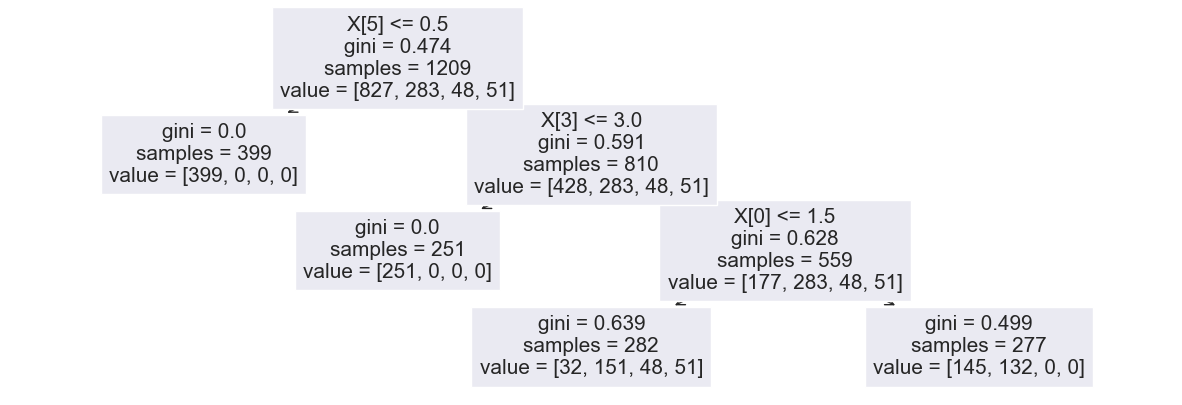

In [28]:
# My practical code
# Ruuning the 3 lines of code that are commented from pdf
from sklearn import tree
tree.plot_tree(clf_gini)
plt.show()

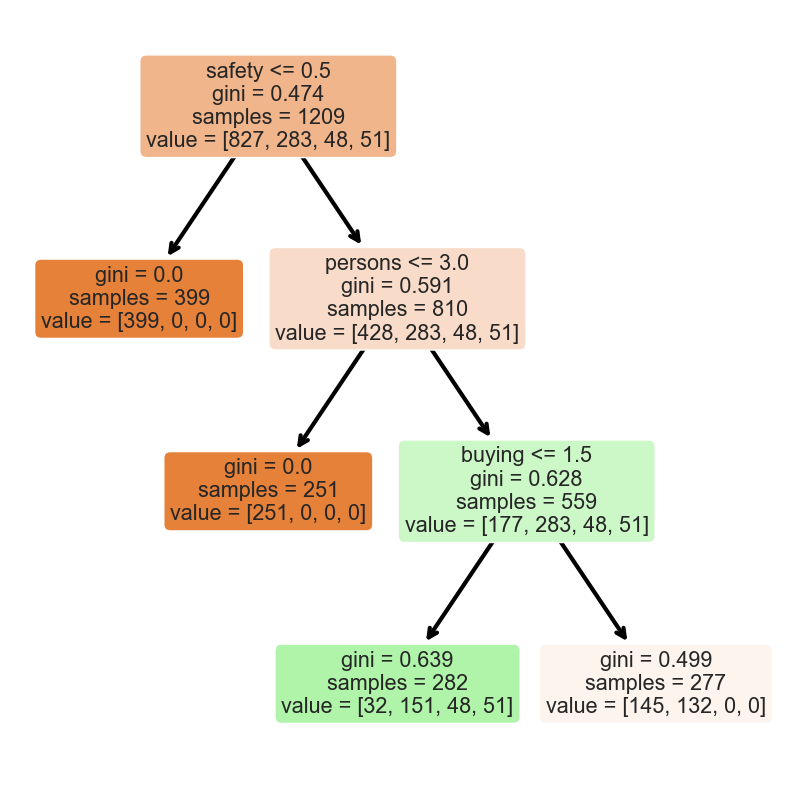

In [29]:
# As we see that theres no arrows to be appear from previous codes
# Example code from pdf
# Here we manually fix the arrows to appear

fig, ax = plt.subplots(figsize = (10, 10))
out = tree.plot_tree(clf_gini, filled = True, rounded = True,
                    feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

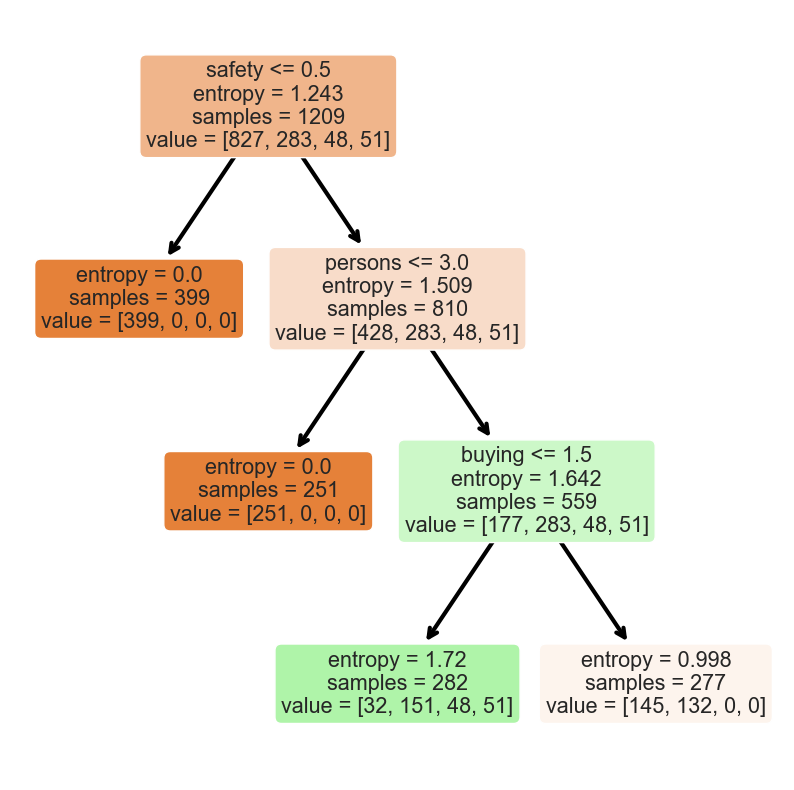

In [30]:
# My practical code
# With entropy

fig, ax = plt.subplots(figsize = (10, 10))
out2 = tree.plot_tree(clf_etpy, filled = True, rounded = True,
                    feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
for o2 in out2:
    arrow2 = o2.arrow_patch
    if arrow2 is not None:
        arrow2.set_edgecolor('black')
        arrow2.set_linewidth(3)

# Random Forests
Now let's compare the decision tree model to a random forest. This is fairly quick to do using sklearn.

In [31]:
# Example code from pdf
# Now let's compare the decision tree to a random forest model
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Example code from pdf
# Prediction for test set
# Print the accuracy score
rfc_pred = rfc.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, rfc_pred)))

Model accuracy score: 0.9827


In [33]:
# My practical code 
# Prediction for train set
# Print the accuracy score for train set
rfc_train_pred = rfc.predict(X_train)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_train, rfc_train_pred)))

Model accuracy score: 1.0000
